In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt



(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)



170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Original VGG16 architecture, no generalization techniques

inputs = tf.keras.layers.Input(shape=[32, 32, 3])    
x = inputs

# block 1
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

# block 2
x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

# block 3 - removed 1 conv2d layer
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

# block 4 - removed 1 conv2d layer
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

# block 5 - removed 1 conv2d layer
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)


# FC layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)


model = tf.keras.Model(inputs=[inputs], outputs=[x])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       147584    
                                                           

In [ ]:
#training with adam
batch_size = 256
epochs = 100
lr = 0.001

opt_adam  = keras.optimizers.Adam(learning_rate=lr)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_batches = (train_dataset.shuffle(batch_size*4)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
history = model.fit(train_batches, validation_data=test_dataset, epochs=epochs, verbose=1)

Epoch 1/100
196/196 [==============================] - 5s 22ms/step - loss: 1.9778 - accuracy: 0.2112 - val_loss: 1.7530 - val_accuracy: 0.3244
Epoch 2/100
196/196 [==============================] - 4s 20ms/step - loss: 1.5543 - accuracy: 0.3958 - val_loss: 1.3410 - val_accuracy: 0.4913
Epoch 3/100
196/196 [==============================] - 4s 20ms/step - loss: 1.1956 - accuracy: 0.5618 - val_loss: 1.0214 - val_accuracy: 0.6437
Epoch 4/100
196/196 [==============================] - 4s 20ms/step - loss: 0.9205 - accuracy: 0.6707 - val_loss: 0.8652 - val_accuracy: 0.6921
Epoch 5/100
196/196 [==============================] - 4s 20ms/step - loss: 0.7623 - accuracy: 0.7342 - val_loss: 0.7935 - val_accuracy: 0.7347
Epoch 6/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6394 - accuracy: 0.7773 - val_loss: 0.8172 - val_accuracy: 0.7371
Epoch 7/100
196/196 [==============================] - 4s 20ms/step - loss: 0.5466 - accuracy: 0.8116 - val_loss: 0.7781 - val_accuracy:

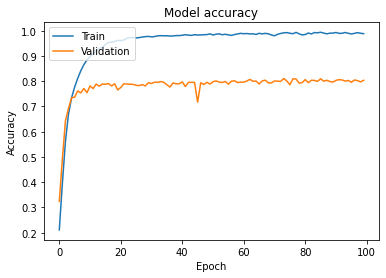

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

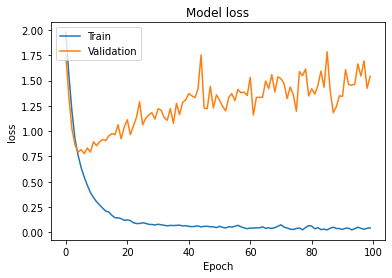

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()